# Home Review (Assurant X Healthcare X Finance)
### TBA team (Elise Blanchet and Samuel Rey)

## Imports

In [1]:
"""
This imports necessary libraries for home review analysis.
"""
import folium
from fpdf import FPDF
from geopy.geocoders import Nominatim
from IPython.display import display, IFrame, Image
import ipywidgets as widgets
import numpy as np
import os
import pandas as pd
import random
from selenium import webdriver

/Users/elibl/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Code

In [2]:
def get_location(address):
    """
    Get the latitude and longitude coordinates of a given address.

    Parameters:
    address (str): The address to geocode.

    Returns:
    tuple: A tuple containing the latitude and longitude coordinates.
    """
    geolocator = Nominatim(user_agent="samuel.rey@etu.sorbonne-universite.fr")
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude)

In [3]:
earthquakes = pd.read_csv('data/earthquakes.csv')
earthquakes['date'] = pd.to_datetime(earthquakes['date'])

def earthquake_risk(location):
    """
    Calculates the earthquake risk at a given location.

    Parameters:
    location (tuple): A tuple containing the latitude and longitude of the location.

    Returns:
    float: The earthquake risk at the given location, represented as a value between 0 and 1.
    """
    lat, long = location
    radius = 2.5**earthquakes['intensity']
    distances = np.sqrt((lat - earthquakes['latitude'])**2 + (long - earthquakes['longitude'])**2)*111
    n = np.sum(distances <= radius)
    return n/200

def earthquake_lived(location, year):
    """
    Calculate the number of earthquakes that occurred within a certain radius of a given location and after a specific year.

    Parameters:
    location (tuple): A tuple containing the latitude and longitude of the location.
    year (int): The year after which the earthquakes should be considered.

    Returns:
    int: The number of earthquakes that occurred within the specified radius.

    """
    lat, long = location
    earthquakes_possible = earthquakes[earthquakes['date'] > pd.to_datetime(f'{year}-01-01')]
    radius = 2.5**earthquakes_possible['intensity']
    distances = np.sqrt((lat - earthquakes_possible['latitude'])**2 + (long - earthquakes_possible['longitude'])**2)*111
    return np.sum(distances <= radius)

In [4]:
pesticides = pd.read_csv('data/pesticides.csv')
threshold = pesticides['concentration'].mean()

def pesticide_exposition(location):
    """
    Determines if a given location is exposed to pesticides.

    Parameters:
    location (tuple): A tuple containing the latitude and longitude of the location.

    Returns:
    bool: True if the location is exposed to pesticides, False otherwise.
    """
    temp = pesticides.copy()
    lat, long = location
    temp['distances'] = np.sqrt((lat - temp['latitude'])**2 + (long - temp['longitude'])**2)*111
    temp = temp[temp['distances'] <= 10]
    temp = temp[temp['concentration'] > threshold]
    return len(temp) > 0

In [5]:
def display_random_exterior():
    """
    Display a random exterior image from the 'data/exterior' directory.

    Returns:
        str: The path of the displayed image.
    """
    images = [f for f in os.listdir('data/exterior') if os.path.isfile(os.path.join('data/exterior', f)) and f.endswith('.jpeg')]
    image_file = random.choice(images)
    image_path = os.path.join('data/exterior', image_file)
    display(Image(image_path, width=500))
    return image_path

def display_random_details():
    """
    Display three random images from the 'data/details' directory.

    Returns:
    - image_paths (list): List of paths to the displayed images.
    """
    images = [f for f in os.listdir('data/details') if os.path.isfile(os.path.join('data/details', f)) and f.endswith('.jpeg')]
    image_paths = []
    for _ in range(3):
        image_file = random.choice(images)
        image_path = os.path.join('data/details', image_file)
        image_paths.append(image_path)
        display(Image(image_path, width=300))
    return image_paths

In [6]:
base_price_input = widgets.Text(
    value='100',
    placeholder='Enter the base insurance price',
    description='Base insurance price:',
    disabled=False
)

def reset_base_price():
    """
    Resets the value of the base_price_input widget to '100'.
    """
    base_price_input.value = '100'

address_input = widgets.Text(
    value='1 rue du Bac, Paris, France',
    placeholder='Enter the address',
    description='Address:',
    disabled=False
)

def reset_address():
    """
    Resets the value of the address_input widget to '1 rue du Bac, Paris, France'.
    """
    address_input.value = '1 rue du Bac, Paris, France'

year_input = widgets.Text(
    value='1950',
    placeholder='Enter the year of construction',
    description='Year:',
    disabled=False
)

def reset_year():
    """
    Resets the value of the year_input widget to '1950'.
    """
    year_input.value = '1950'

surface_input = widgets.Text(
    value='100',
    placeholder='Enter the surface area',
    description='Surface area (m2):',
    disabled=False
)

def reset_surface():
    """
    Resets the value of the surface_input widget to '100'.
    """
    surface_input.value = '100'

price_input = widgets.Text(
    value='10000',
    placeholder='Enter the expected price per square meter',
    description='Price (€):',
    disabled=False
)

def reset_price():
    """
    Resets the value of the price_input widget to '10000'.
    """
    price_input.value = '10000'

In [7]:
checkbox_exterior_1 = widgets.Checkbox(value=True, description='Damaged roof', disabled=False)
checkbox_exterior_2 = widgets.Checkbox(value=False, description='Damaged facade(s)', disabled=False)
checkbox_exterior_3 = widgets.Checkbox(value=False, description='Damaged land', disabled=False)
checkbox_exterior_4a = widgets.Checkbox(value=False, description='Cracks (< 0.2mm)', disabled=False)
checkbox_exterior_4b = widgets.Checkbox(value=False, description='Cracks (0.2mm — 2mm)', disabled=False)
checkbox_exterior_4c = widgets.Checkbox(value=False, description='Cracks (> 2mm)', disabled=False)
checkbox_exterior_5 = widgets.Checkbox(value=False, description='Damaged window(s)', disabled=False)
checkbox_exterior_6 = widgets.Checkbox(value=False, description='Damaged door(s)', disabled=False)
checkbox_exterior_7 = widgets.Checkbox(value=False, description='Fire traces', disabled=False)

title_exterior = widgets.Label('Exterior:')
checkboxes_exterior = widgets.VBox([title_exterior, checkbox_exterior_1, checkbox_exterior_2, checkbox_exterior_3, checkbox_exterior_4a, checkbox_exterior_4b, checkbox_exterior_4c, checkbox_exterior_5, checkbox_exterior_6, checkbox_exterior_7])

def reset_exterior():
    checkbox_exterior_1.value = True
    checkbox_exterior_2.value = False
    checkbox_exterior_3.value = False
    checkbox_exterior_4a.value = False
    checkbox_exterior_4b.value = False
    checkbox_exterior_4c.value = False
    checkbox_exterior_5.value = False
    checkbox_exterior_6.value = False
    checkbox_exterior_7.value = False

checkbox_details_exterior_1 = widgets.Checkbox(value=True, description='Damaged roof', disabled=False)
checkbox_details_exterior_2 = widgets.Checkbox(value=False, description='Damaged facade(s)', disabled=False)
checkbox_details_exterior_3 = widgets.Checkbox(value=False, description='Damaged land', disabled=False)
checkbox_details_exterior_4a = widgets.Checkbox(value=False, description='Cracks (< 0.2mm)', disabled=False)
checkbox_details_exterior_4b = widgets.Checkbox(value=False, description='Cracks (0.2mm — 2mm)', disabled=False)
checkbox_details_exterior_4c = widgets.Checkbox(value=False, description='Cracks (> 2mm)', disabled=False)
checkbox_details_exterior_5 = widgets.Checkbox(value=False, description='Damaged window(s)', disabled=False)
checkbox_details_exterior_6 = widgets.Checkbox(value=False, description='Damaged door(s)', disabled=False)
checkbox_details_exterior_7 = widgets.Checkbox(value=False, description='Fire traces', disabled=False)
checkbox_details_exterior_8 = widgets.Checkbox(value=False, description='Stalactites', disabled=False)

title_details_exterior = widgets.Label('Exterior:')
checkboxes_details_exterior = widgets.VBox([title_details_exterior, checkbox_details_exterior_1, checkbox_details_exterior_2, checkbox_details_exterior_3, checkbox_details_exterior_4a, checkbox_details_exterior_4b, checkbox_details_exterior_4c, checkbox_details_exterior_5, checkbox_details_exterior_6, checkbox_details_exterior_7, checkbox_details_exterior_8])

def reset_details_exterior():
    checkbox_details_exterior_1.value = True
    checkbox_details_exterior_2.value = False
    checkbox_details_exterior_3.value = False
    checkbox_details_exterior_4a.value = False
    checkbox_details_exterior_4b.value = False
    checkbox_details_exterior_4c.value = False
    checkbox_details_exterior_5.value = False
    checkbox_details_exterior_6.value = False
    checkbox_details_exterior_7.value = False
    checkbox_details_exterior_8.value = False

checkbox_details_interior_1 = widgets.Checkbox(value=True, description='Damaged ceiling', disabled=False)
checkbox_details_interior_2 = widgets.Checkbox(value=False, description='Damaged wall(s)', disabled=False)
checkbox_details_interior_3 = widgets.Checkbox(value=False, description='Damaged floor', disabled=False)
checkbox_details_interior_4a = widgets.Checkbox(value=False, description='Cracks (< 0.2mm)', disabled=False)
checkbox_details_interior_4b = widgets.Checkbox(value=False, description='Cracks (0.2mm — 2mm)', disabled=False)
checkbox_details_interior_4c = widgets.Checkbox(value=False, description='Cracks (> 2mm)', disabled=False)
checkbox_details_interior_5 = widgets.Checkbox(value=False, description='Damaged window(s)', disabled=False)
checkbox_details_interior_6 = widgets.Checkbox(value=False, description='Damaged door(s)', disabled=False)
checkbox_details_interior_7 = widgets.Checkbox(value=False, description='Fire traces', disabled=False)
checkbox_details_interior_8 = widgets.Checkbox(value=False, description='Water leak', disabled=False)
checkbox_details_interior_9 = widgets.Checkbox(value=False, description='Condensation', disabled=False)
checkbox_details_interior_10 = widgets.Checkbox(value=False, description='Insects/Rodents', disabled=False)
checkbox_details_interior_11 = widgets.Checkbox(value=False, description='Infiltration', disabled=False)
checkbox_details_interior_12 = widgets.Checkbox(value=False, description='Mold', disabled=False)
checkbox_details_interior_13 = widgets.Checkbox(value=False, description='Rot', disabled=False)

title_details_interior = widgets.Label('Interior:')
checkboxes_details_interior = widgets.VBox([title_details_interior, checkbox_details_interior_1, checkbox_details_interior_2, checkbox_details_interior_3, checkbox_details_interior_4a, checkbox_details_interior_4b, checkbox_details_interior_4c, checkbox_details_interior_5, checkbox_details_interior_6, checkbox_details_interior_7, checkbox_details_interior_8, checkbox_details_interior_9, checkbox_details_interior_10, checkbox_details_interior_11, checkbox_details_interior_12, checkbox_details_interior_13])

def reset_details_interior():
    """
    Resets the values of various checkboxes related to interior details.
    """
    checkbox_details_interior_1.value = True
    checkbox_details_interior_2.value = False
    checkbox_details_interior_3.value = False
    checkbox_details_interior_4a.value = False
    checkbox_details_interior_4b.value = False
    checkbox_details_interior_4c.value = False
    checkbox_details_interior_5.value = False
    checkbox_details_interior_6.value = False
    checkbox_details_interior_7.value = False
    checkbox_details_interior_8.value = False
    checkbox_details_interior_9.value = False
    checkbox_details_interior_10.value = False
    checkbox_details_interior_11.value = False
    checkbox_details_interior_12.value = False
    checkbox_details_interior_13.value = False

title_details = widgets.Label('Details:\n')
checkboxes_details = widgets.HBox([title_details, checkboxes_details_exterior, checkboxes_details_interior])

def reset_details():
    """
    Resets the details of the home review.
    """
    reset_details_interior()
    reset_details_exterior()

In [8]:
def count_exterior_issues():
    """
    Counts the number of exterior issues based on the values of various checkboxes.

    Returns:
        int: The total count of exterior issues.
    """
    return sum([checkbox_exterior_1.value, checkbox_exterior_2.value, checkbox_exterior_3.value, checkbox_exterior_4a.value, checkbox_exterior_4b, checkbox_exterior_4c, checkbox_exterior_5.value, checkbox_exterior_6.value, checkbox_exterior_7.value, checkbox_details_exterior_1.value, checkbox_details_exterior_2.value, checkbox_details_exterior_3.value, checkbox_details_exterior_4a.value, checkbox_details_exterior_4b.value, checkbox_details_exterior_4c.value, checkbox_details_exterior_5.value, checkbox_details_exterior_6.value, checkbox_details_exterior_7.value, checkbox_details_exterior_8.value])

def list_exterior_issues():
    """
    Returns a list of exterior issues and their solutions found during a home review.

    Returns:
    - issues (list): A list of strings representing the identified issues and their corresponding solutions.
    """

    issues = []
    if checkbox_exterior_1.value:
        issues.append('Damaged roof, solution: check beam integrity, reapply insulation and repair the roof.')
    if checkbox_exterior_2.value:
        issues.append('Damaged facade(s), solution: check structure integrity, repair the facade(s) and reapply coating.')
    if checkbox_exterior_3.value:
        issues.append('Damaged land, solution: check pipe integrity, remove roots from the hole(s) and fill the hole(s).')
    if checkbox_exterior_4a.value:
        issues.append('Cracks (< 0.2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_exterior_4b.value:
        issues.append('Cracks (0.2mm — 2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_exterior_4c.value:
        issues.append('Cracks (> 2mm), solution: do not fill the crack(s) and check if the affected part is a foundation wall,\na beam, a slab or a post, if so, call an expert.')
    if checkbox_exterior_5.value:
        issues.append('Damaged window(s), solution: replace the window(s) and check for airtightness and watertightness.')
    if checkbox_exterior_6.value:
        issues.append('Damaged door(s), solution: replace the door(s) and check for airtightness and watertightness.')
    if checkbox_exterior_7.value:
        issues.append('Fire traces, solution: call an expert to check for toxic air particles and residues.')
    if checkbox_details_exterior_1.value:
        issues.append('Damaged roof, solution: check beam integrity, reapply insulation and repair the roof.')
    if checkbox_details_exterior_2.value:
        issues.append('Damaged facade(s), solution: check structure integrity, repair the facade(s) and reapply coating.')
    if checkbox_details_exterior_3.value:
        issues.append('Damaged land, solution: check pipe integrity, remove roots from the hole(s) and fill the hole(s).')
    if checkbox_details_exterior_4a.value:
        issues.append('Cracks (< 0.2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_details_exterior_4b.value:
        issues.append('Cracks (0.2mm — 2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_details_exterior_4c.value:
        issues.append('Cracks (> 2mm), solution: do not fill the crack(s) and check if the affected part is a foundation wall,\na beam, a slab or a post, if so, call an expert.')
    if checkbox_details_exterior_5.value:
        issues.append('Damaged window(s), solution: replace the window(s) and check for airtightness and watertightness.')
    if checkbox_details_exterior_6.value:
        issues.append('Damaged door(s), solution: replace the door(s) and check for airtightness and watertightness.')
    if checkbox_details_exterior_7.value:
        issues.append('Fire traces, solution: check if stucture was affected, if so, call an expert.')
    if checkbox_details_exterior_8.value:
        issues.append('Stalactites, solution: remove the stalactites while watching out for what is under them.')
    issues = list(set(issues))
    return issues

def count_interior_issues():
    """
    Counts the number of interior issues based on the values of various checkboxes.

    Returns:
        int: The total count of interior issues.
    """
    return sum([checkbox_details_interior_1.value, checkbox_details_interior_2.value, checkbox_details_interior_3.value, checkbox_details_interior_4a.value, checkbox_details_interior_4b.value, checkbox_details_interior_4c.value, checkbox_details_interior_5.value, checkbox_details_interior_6.value, checkbox_details_interior_7.value, checkbox_details_interior_8.value, checkbox_details_interior_9.value, checkbox_details_interior_10.value, checkbox_details_interior_11.value, checkbox_details_interior_12.value, checkbox_details_interior_13.value])

def list_interior_issues():
    """
    Returns a list of interior issues found during a home review.

    Returns:
    - issues (list): A list of interior issues found during the home review.
    """

    issues = []
    if checkbox_details_interior_1.value:
        issues.append('Damaged ceiling, solution: check beam integrity and repair the ceiling while watching out for electricity\nand pipes.')
    if checkbox_details_interior_2.value:
        issues.append('Damaged wall(s), solution: check stucture integrity if affected part is bearing wall(s), check for roof\nsubsidence and repair the wall(s) while using appropriate support.')
    if checkbox_details_interior_3.value:
        issues.append('Damaged floor, solution: check beam integrity and repair the floor while watching out for electricity\nand pipes.')
    if checkbox_details_interior_4a.value:
        issues.append('Cracks (< 0.2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_details_interior_4b.value:
        issues.append('Cracks (0.2mm — 2mm), solution: do not fill the crack(s) and monitor evolution over time.')
    if checkbox_details_interior_4c.value:
        issues.append('Cracks (> 2mm), solution: do not fill the crack(s) and check if the affected part is a foundation wall,\na beam, a slab or a post, if so, call an expert.')
    if checkbox_details_interior_5.value:
        issues.append('Damaged window(s), solution: check for roof subsidence and repair or replace the window(s).')
    if checkbox_details_interior_6.value:
        issues.append('Damaged door(s), solution: repair or replace the door.')
    if checkbox_details_interior_7.value:
        issues.append('Fire traces, solution: call an expert to check for toxic air particles and residues.')
    if checkbox_details_interior_8.value:
        issues.append('Water leak, solution: fix the leak and check for residual humidity.')
    if checkbox_details_interior_9.value:
        issues.append('Condensation, solution: use a dehumidifier.')
    if checkbox_details_interior_10.value:
        issues.append('Insects/Rodents, solution: use appropriate repellents or traps.')
    if checkbox_details_interior_11.value:
        issues.append('Infiltration, solution: locate the leak, fix it, remove affected parts and ventilate the room.')
    if checkbox_details_interior_12.value:
        issues.append('Mold, solution: remove affected parts, use a fungicide and ventilate the room.')
    if checkbox_details_interior_13.value:
        issues.append('Rot, solution: replace affected parts, if not possible, treat them to prevent further damage.')
    issues = list(set(issues))
    return issues

In [9]:
def list_health():
    """
    Returns a list of health issues based on the selected checkboxes.

    Returns:
    list: A list of health issues.
    """
    issues = []
    if checkbox_details_interior_7.value:
        issues.append('Fire traces: risk of prolonged exposition to toxic gases and risk of contact with toxic residudes.')
    if checkbox_details_interior_8.value:
        issues.append('Water leak: risk of prolonged exposition to humidity.')
    if checkbox_details_interior_9.value:
        issues.append('Condensation: risk of prolonged exposition to humidity.')
    if checkbox_details_interior_10.value:
        issues.append('Insects/Rodents: risk of disease transmission.')
    if checkbox_details_interior_11.value:
        issues.append('Infiltration: risk of prolonged exposition to humidity.')
    if checkbox_details_interior_12.value:
        issues.append('Mold: risk of disease transmission.')
    return issues


In [10]:
def insurance_multiplier(price):
    """
    Calculates the insurance multiplier based on various factors such as earthquake risk and property damages.

    Parameters:
    price (float): The base price of the insurance policy.

    Returns:
    float: The final price of the insurance policy after applying the multiplier.
    """
    price *= 1 + earthquake_risk(get_location(address_input.value))
    price *= 1 + (earthquake_lived(get_location(address_input.value), year_input.value)/100)

    if checkbox_exterior_1.value: # Damaged roof
        price *= 1.2
    if checkbox_exterior_2.value: # Damaged facade(s)
        price *= 1.2
    if checkbox_exterior_3.value: # Damaged land
        price *= 1.1
    if checkbox_exterior_4a.value: # Cracks (< 0.2mm)
        price *= 1.1
    if checkbox_exterior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 1.2
    if checkbox_exterior_4c.value: # Cracks (> 2mm)
        price *= 1.3
    if checkbox_exterior_5.value: # Damaged window(s)
        price *= 1.1
    if checkbox_exterior_6.value: # Damaged door(s)
        price *= 1.1
    if checkbox_exterior_7.value: # Fire traces
        price *= 1.2
    
    if checkbox_details_exterior_1.value: # Damaged roof
        price *= 1.2
    if checkbox_details_exterior_2.value: # Damaged facade(s)
        price *= 1.2
    if checkbox_details_exterior_3.value: # Damaged land
        price *= 1.1
    if checkbox_details_exterior_4a.value: # Cracks (< 0.2mm)
        price *= 1.1
    if checkbox_details_exterior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 1.2
    if checkbox_details_exterior_4c.value: # Cracks (> 2mm)
        price *= 1.3
    if checkbox_details_exterior_5.value: # Damaged window(s)
        price *= 1.1
    if checkbox_details_exterior_6.value: # Damaged door(s)
        price *= 1.1
    if checkbox_details_exterior_7.value: # Fire traces
        price *= 1.2
    if checkbox_details_exterior_8.value: # Stalactites
        price *= 1.1
    
    if checkbox_details_interior_1.value: # Damaged ceiling
        price *= 1.1
    if checkbox_details_interior_2.value: # Damaged wall(s)
        price *= 1.2
    if checkbox_details_interior_3.value: # Damaged floor
        price *= 1.1
    if checkbox_details_interior_4a.value: # Cracks (< 0.2mm)
        price *= 1.1
    if checkbox_details_interior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 1.2
    if checkbox_details_interior_4c.value: # Cracks (> 2mm)
        price *= 1.3
    if checkbox_details_interior_5.value: # Damaged window(s)
        price *= 1.1
    if checkbox_details_interior_6.value: # Damaged door(s)
        price *= 1.1
    if checkbox_details_interior_7.value: # Fire traces
        price *= 1.2
    if checkbox_details_interior_8.value: # Water leak
        price *= 1.1
    if checkbox_details_interior_9.value: # Condensation
        price *= 1.1
    if checkbox_details_interior_10.value: # Insects/Rodents
        price *= 1.1
    if checkbox_details_interior_11.value: # Infiltration
        price *= 1.1
    if checkbox_details_interior_12.value: # Mold
        price *= 1.1
    if checkbox_details_interior_13.value: # Rot
        price *= 1.1

    return price

In [11]:
def price_multiplier(price):
    """
    Calculates the final price of a home based on various factors.

    Parameters:
    price (float): The initial price of the home.

    Returns:
    float: The final price of the home after applying the necessary adjustments.
    """
    price *= 1 - earthquake_risk(get_location(address_input.value))
    price *= 1 - (earthquake_lived(get_location(address_input.value), year_input.value)/100)

    if checkbox_exterior_1.value: # Damaged roof
        price *= 0.8
    if checkbox_exterior_2.value: # Damaged facade(s)
        price *= 0.8
    if checkbox_exterior_3.value: # Damaged land
        price *= 0.9
    if checkbox_exterior_4a.value: # Cracks (< 0.2mm)
        price *= 0.9
    if checkbox_exterior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 0.8
    if checkbox_exterior_4c.value: # Cracks (> 2mm)
        price *= 0.7
    if checkbox_exterior_5.value: # Damaged window(s)
        price *= 0.9
    if checkbox_exterior_6.value: # Damaged door(s)
        price *= 0.9
    if checkbox_exterior_7.value: # Fire traces
        price *= 0.8
    
    if checkbox_details_exterior_1.value: # Damaged roof
        price *= 0.8
    if checkbox_details_exterior_2.value: # Damaged facade(s)
        price *= 0.8
    if checkbox_details_exterior_3.value: # Damaged land
        price *= 0.9
    if checkbox_details_exterior_4a.value: # Cracks (< 0.2mm)
        price *= 0.9
    if checkbox_details_exterior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 0.9
    if checkbox_details_exterior_4c.value: # Cracks (> 2mm)
        price *= 0.7
    if checkbox_details_exterior_5.value: # Damaged window(s)
        price *= 0.9
    if checkbox_details_exterior_6.value: # Damaged door(s)
        price *= 0.9
    if checkbox_details_exterior_7.value: # Fire traces
        price *= 0.8
    if checkbox_details_exterior_8.value: # Stalactites
        price *= 0.9
    
    if checkbox_details_interior_1.value: # Damaged ceiling
        price *= 0.9
    if checkbox_details_interior_2.value: # Damaged wall(s)
        price *= 0.8
    if checkbox_details_interior_3.value: # Damaged floor
        price *= 0.9
    if checkbox_details_interior_4a.value: # Cracks (< 0.2mm)
        price *= 0.9
    if checkbox_details_interior_4b.value: # Cracks (0.2mm — 2mm)
        price *= 0.8
    if checkbox_details_interior_4c.value: # Cracks (> 2mm)
        price *= 0.3
    if checkbox_details_interior_5.value: # Damaged window(s)
        price *= 0.9
    if checkbox_details_interior_6.value: # Damaged door(s)
        price *= 0.9
    if checkbox_details_interior_7.value: # Fire traces
        price *= 0.9
    if checkbox_details_interior_8.value: # Water leak
        price *= 0.9
    if checkbox_details_interior_9.value: # Condensation
        price *= 0.9
    if checkbox_details_interior_10.value: # Insects/Rodents
        price *= 0.9
    if checkbox_details_interior_11.value: # Infiltration
        price *= 0.9
    if checkbox_details_interior_12.value: # Mold
        price *= 0.9
    if checkbox_details_interior_13.value: # Rot
        price *= 0.9

    return price

In [23]:
def display_map(location):
    """
    Display a map with a marker at the specified location.

    Parameters:
    - location: tuple, the latitude and longitude coordinates of the location

    Returns:
    - str: the filepath of the generated map image
    """
    m = folium.Map(location=location, zoom_start=7, zoom_control=False)
    folium.Marker(location).add_to(m)
    m.options['dragging'] = False
    m.options['touchZoom'] = False
    m.options['doubleClickZoom'] = False
    m.options['scrollWheelZoom'] = False
    m.options['boxZoom'] = False
    m.save('data/map.html')
    driver = webdriver.Safari()
    driver.get('file://'+os.path.abspath('data/map.html'))
    driver.save_screenshot('data/map.png')
    driver.quit()
    return 'data/map.png'

def create_pdf(exterior, details):
    """
    Creates a PDF document with information about a property.

    Parameters:
    - exterior (str): Path to the image file of the property exterior.
    - details (list): List of paths to the image files of property details.

    Returns:
    - None
    """
    address = address_input.value
    location = get_location(address)
    pdf = FPDF()
    pdf.add_page()

    pdf.set_font('Arial', 'B', size=20)
    pdf.cell(200, 10, txt=address, ln=True, align='C')

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Property info', ln=True)
    pdf.set_font('Arial', size=12)
    pdf.cell(200, 10, txt='Year of construction: {}'.format(year_input.value), ln=True)
    pdf.cell(200, 10, txt='Surface area: {} m2'.format(surface_input.value), ln=True)

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Property exterior', ln=True)
    pdf.image(exterior, w = 100)

    pdf.cell(200, 10, txt='Property details', ln=True)
    pdf.image(details[0], w = 50)
    pdf.cell(200, 10, ln=True)
    pdf.image(details[1], w = 50)
    pdf.cell(200, 10, ln=True)
    pdf.image(details[2], w = 50)

    pdf.add_page()

    pdf.cell(200, 10, txt='Map', ln=True)
    pdf.image(display_map(location), w = 100)

    pdf.cell(200, 10, txt='Exterior issues', ln=True)
    pdf.set_font('Arial', size=12)
    for issue in list_exterior_issues():
        pdf.cell(200, 10, txt=issue, ln=True)
    
    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Interior issues', ln=True)
    pdf.set_font('Arial', size=12)
    for issue in list_interior_issues():
        pdf.cell(200, 10, txt=issue, ln=True)

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Earthquakes', ln=True)
    pdf.set_font('Arial', size=12)
    pdf.cell(200, 10, txt='Earthquakes lived: {}'.format(earthquake_lived(location, year_input.value)), ln=True)
    pdf.cell(200, 10, txt='Earthquake risk in the next 6 months: {}%'.format(earthquake_risk(location)*100), ln=True)

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Insurance', ln=True)
    pdf.set_font('Arial', size=12)
    pdf.cell(200, 10, txt='Base insurance price: {}'.format(base_price_input.value), ln=True)
    pdf.cell(200, 10, txt='Final insurance price: {}'.format(insurance_multiplier(int(base_price_input.value))), ln=True)

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Long-term health concerns', ln=True)
    pdf.set_font('Arial', size=12)
    pdf.cell(200, 10, txt='Area exposed to pesticides: {}'.format(pesticide_exposition(location)), ln=True)
    pdf.cell(200, 10, txt='Health-impacting issues: {}'.format(list_health()), ln=True)

    pdf.set_font('Arial', 'B', size=15)
    pdf.cell(200, 10, txt='Property price esimation', ln=True)
    pdf.set_font('Arial', size=12)
    pdf.cell(200, 10, txt='Estimated price: {}'.format(price_multiplier(int(price_input.value))), ln=True)
    
    pdf.output("{}.pdf".format(address))

# Application

In [13]:
reset_base_price()
display(base_price_input)

Text(value='100', description='Base insurance price:', placeholder='Enter the base insurance price')

In [14]:
reset_address()
display(address_input)

Text(value='1 rue du Bac, Paris, France', description='Address:', placeholder='Enter the address')

In [15]:
reset_year()
display(year_input)

Text(value='1950', description='Year:', placeholder='Enter the year of construction')

In [16]:
reset_surface()
display(surface_input)

Text(value='100', description='Surface area (m2):', placeholder='Enter the surface area')

In [17]:
reset_price()
display(price_input)

Text(value='10000', description='Price (€):', placeholder='Enter the expected price per square meter')

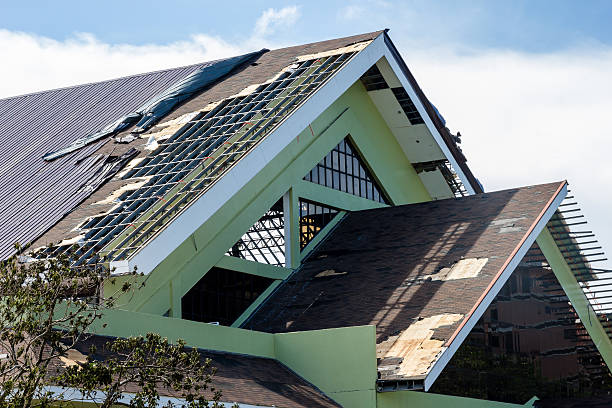

In [18]:
exterior = display_random_exterior()

In [19]:
reset_exterior()
display(checkboxes_exterior)

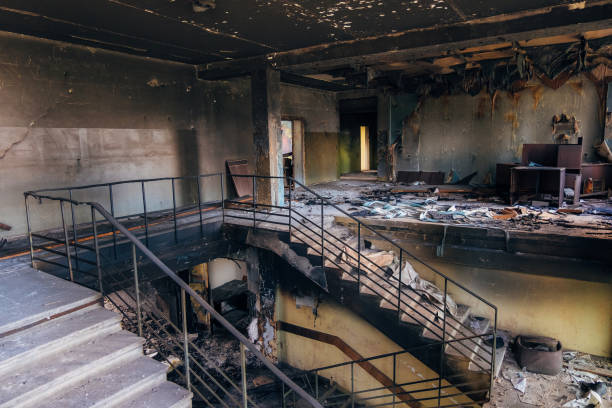

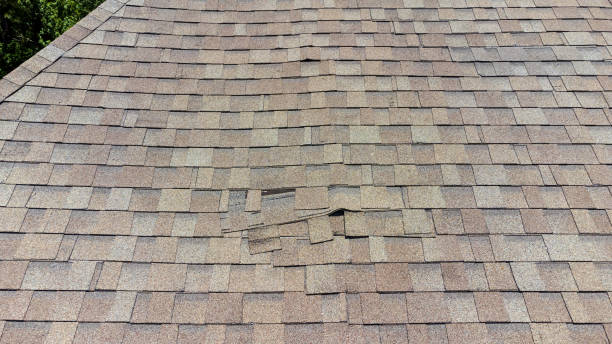

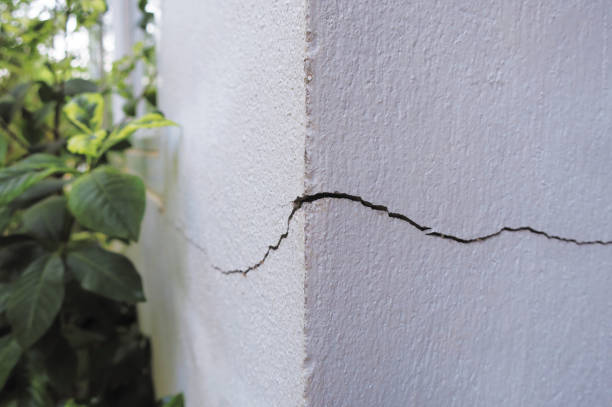

In [20]:
details = display_random_details()

In [21]:
reset_details()
display(checkboxes_details)

In [24]:
create_pdf(exterior, details)